In [1]:
### Script to apply the prediction models trained on the MU data on the Groningen data

#############################################
# Prerequisites - Load Libraries

In [2]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'”


[1] "/home/icb/corinna.losert/miniconda3/envs/stark_stemi_R_Env_4_1//lib/R/library"



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
   

In [3]:
source('MS4_Plot_Config.r')

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


###############################################
# Preqrequisites Configurations & Parameters

In [4]:
result_path_rep = '../results/current/Reproduction_GR' # path to input data from GR

In [5]:
result_path_model = '../results/current' # path to pre-trained model

In [6]:
name1 = 'V_AZIMUTH_REPRODUCTION_v2'   # name of Azimuth reproduction dataset V2

# Load Data 

## Prepared combined data

In [7]:
### Load the normalized Groningen dataset

In [8]:
path = paste0(result_path_rep, '/Combined_Data_',name1,'.csv')
data_long1 = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-11 16:58:49 CET"


In [9]:
data_long = data_long1

In [10]:
head(data_long,2)

,X,sample_id,variable,value,type
,<int>,<chr>,<chr>,<dbl>,<chr>
1,1,Baseline.TEST_1,B.cell__ACTB,-0.1451209,single_cell
2,2,Baseline.TEST_12,B.cell__ACTB,0.2310092,single_cell


## Model and features

In [11]:
## Load the model trained on the Munich data

In [12]:
result_path_model

[1] "../results/current"

### Model based on top Factor3/ Factor 4 Features

In [13]:
### Load the model

In [14]:
path = paste0(result_path_model, '/Reproduction/GX3_Model', '.Rdata')
load( file = path )
print(file.info(path)$mtime)

[1] "2024-01-11 17:47:56 CET"


In [15]:
best_model


Call:  glmnet(x = x, y = y, family = "binomial", alpha = 1, lambda = best_lambda) 

  Df  %Dev  Lambda
1  6 90.68 0.03313

In [16]:
best_model$lambda

[1] 0.0331308

In [17]:
lambda = best_model$lambda # setlambda

In [18]:
### Load the input features used to train the model

In [19]:
path = paste0(result_path_model , '/Reproduction/GX3_input_features_lasso.csv')
input_features = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-11 17:47:56 CET"


### Model based on selected NK cell features

In [20]:
## Load the model

In [21]:
path =  paste0(result_path_model, '/Reproduction/GX3_NK_Model_GLM', '.Rdata')
load( file =path)
print(file.info(path)$mtime)

[1] "2024-01-11 17:47:56 CET"


In [22]:
coef(model_NK)

(Intercept)  Nkdim__CD53  Nkdim__GZMB Nkdim__TXNIP 
  -2.7682178    0.6955691    0.2096444    0.8353367

In [23]:
### Load the input features used to train the model

In [24]:
path = paste0(result_path_model , '/Reproduction/GX3_NK_input_features_lasso.csv')
input_features_NK = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-11 17:47:56 CET"


## Groningen sample classification & clinical data

In [25]:
## Sample_meta data of the groningen cohort

In [26]:
path = paste0(result_path_rep, '/groningen_output_class.csv')
sample_data_load = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-11 16:59:29 CET"


In [27]:
sample_data = sample_data_load

In [28]:
head(sample_data,2)

,record_id,outcome
,<int>,<chr>
1,14,Better
2,15,Better


In [29]:
nrow(sample_data)

[1] 16

In [30]:
## Clinical data from the Groningen cohort

In [31]:
path = paste0(result_path_rep, '/clinical_values_groningen.csv')
clinical_data= read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-11 16:56:44 CET"


In [32]:
nrow(clinical_data)

[1] 40

In [33]:
## Merge sample data and clinical data

In [34]:
sample_data = merge(clinical_data, sample_data, all.x = TRUE)

In [35]:
nrow(sample_data)

[1] 40

In [36]:
#head(sample_data,2)

In [37]:
### Sample data with available outcome classification

In [38]:
nrow(sample_data[!is.na(sample_data$outcome),])  # merged outcome for all samples for which known 

[1] 16

## Predictions on Training Data (MU)

In [39]:
### for NK Feature trained model load the preictions on the training data

In [40]:
path = paste0(result_path_model, '/Reproduction/GX3_NK_prediction_result_TRAIN.csv')
train_predictions_NK = read.csv(path)
print(file.info(path)$mtime)

[1] "2024-01-11 17:47:56 CET"


In [41]:
head(train_predictions_NK,2)

,X,y,s1
,<int>,<int>,<dbl>
1,42,1,0.1309654
2,46,1,0.4522560


# Apply prediction model

## Prepare Data

In [42]:
head(data_long,2)  # Groningen data

,X,sample_id,variable,value,type
,<int>,<chr>,<chr>,<dbl>,<chr>
1,1,Baseline.TEST_1,B.cell__ACTB,-0.1451209,single_cell
2,2,Baseline.TEST_12,B.cell__ACTB,0.2310092,single_cell


In [43]:
## Adjust some of the columns

In [44]:
data_long$sample_id = as.character(data_long$sample_id)

In [45]:
data_long$type = str_replace(data_long$variable, '__.*', '')
data_long$type = str_replace(data_long$type, '\\.', '')

In [46]:
data_long$variable_name = str_replace(data_long$variable, '.*__', '')

In [47]:
## Make sure type column matches

In [48]:
data_long$type = str_replace(data_long$type, 'NKdim', 'Nkdim')
data_long$variable = str_replace(data_long$variable, 'NKdim', 'Nkdim')

## Apply model to new data

### Model based on top Factor3/ Factor4 features

In [49]:
## List of the input features

In [50]:
input_features$X = NULL

In [51]:
head(input_features,2)

,features
,<chr>
1,CD4_TCM__ATP5F1E
2,CD4_TCM__ATP5ME


In [52]:
nrow(input_features)

[1] 109

In [53]:
## Get Groningen data values for the input features

In [54]:
input_data = merge(input_features, unique(data_long$sample_id), all = TRUE)
colnames(input_data) = c( 'variable', 'sample_id')

In [55]:
nrow(input_data)
nrow(unique(input_data))

[1] 11227

[1] 11227

In [56]:
head(input_data,2)

,variable,sample_id
,<chr>,<chr>
1,CD4_TCM__ATP5F1E,Baseline.TEST_1
2,CD4_TCM__ATP5ME,Baseline.TEST_1


In [57]:
input_data = merge(input_data, data_long, all.x = TRUE)

In [58]:
head(input_data,2)

,variable,sample_id,X,value,type,variable_name
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,CD4_TCM__ATP5F1E,Baseline.TEST_1,NA,NA,NA,NA
2,CD4_TCM__ATP5F1E,Baseline.TEST_12,NA,NA,NA,NA


In [59]:
### Transform to wide format

In [60]:
input_data = input_data %>% dcast(sample_id ~ variable, value.var = 'value')

In [61]:
rownames(input_data) = input_data$sample_id
input_data$sample_id = NULL

In [62]:
head(input_data,2)

,CD4_TCM__ATP5F1E,CD4_TCM__ATP5ME,CD4_TCM__ATP5MPL,CD4_TCM__C6orf48,CD4_TCM__COX6A1,CD4_TCM__COX7C,CD4_TCM__EIF1,CD4_TCM__EVI2B,CD4_TCM__HLA.F,CD4_TCM__HNRNPDL,⋯,Nkdim__GZMB,Nkdim__HLA.A,Nkdim__HLA.F,Nkdim__IQGAP2,Nkdim__LITAF,Nkdim__POLR2L,Nkdim__PRF1,Nkdim__RSRP1,Nkdim__TMA7,Nkdim__TXNIP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Baseline.TEST_1,NA,NA,NA,-1.768825,1.496147,-0.4219289,0.7683022,-0.3441025,-0.4484255,-1.1048357,⋯,2.3410271,-0.4617916,0.4219289,NA,1.127301,1.0829150,0.1329527,NA,1.362383,-0.14512094
Baseline.TEST_12,NA,NA,NA,-0.060292,-1.574445,-0.8010945,0.2186495,-1.8980287,-2.3410271,-0.7683022,⋯,0.1695238,0.6744898,-0.7206029,NA,1.362383,0.6594367,-0.7050659,NA,-1.276092,-0.09655862


In [63]:
ncol(input_data)

[1] 109

In [64]:
# features that are not available in Groningen data
colSums(input_data)[is.na(colSums(input_data))]

CD4_TCM__ATP5F1E   CD4_TCM__ATP5ME  CD4_TCM__ATP5MPL     CD4_TCM__MCUB 
               NA                NA                NA                NA 
cMono__AC020916.1    cMono__ATP5F1E     cMono__ATP5MD     cMono__ATP5ME 
               NA                NA                NA                NA 
    cMono__ATP5MF    cMono__ATP5MPL      cMono__COPS9       cMono__ELOB 
               NA                NA                NA                NA 
    cMono__HEXIM1     cMono__UQCR11   ncMono__ATP5F1E    Nkdim__ATP5F1E 
               NA                NA                NA                NA 
    Nkdim__ATP5ME     Nkdim__IQGAP2      Nkdim__RSRP1 
               NA                NA                NA

In [65]:
# set non-available features to 0

In [66]:
input_data[is.na(input_data)]= 0

In [67]:
nrow(input_data)

[1] 103

In [68]:
## Predict for Groningen data based on model

In [69]:
class(best_model)

[1] "lognet" "glmnet"

In [70]:
prediction = stats::predict(best_model,  newx=as.matrix(input_data),s =lambda, type = 'response')

In [71]:
prediction = data.frame(prediction)

In [72]:
prediction$sample_id = rownames(prediction)

In [73]:
colnames(prediction) = c('predicted_value', 'sample_id')

In [74]:
head(prediction,2)

,predicted_value,sample_id
,<dbl>,<chr>
Baseline.TEST_1,0.0004455915,Baseline.TEST_1
Baseline.TEST_12,0.0007335106,Baseline.TEST_12


In [75]:
nrow(prediction)

[1] 103

In [76]:
### Save result

In [77]:
write.csv(prediction, paste0(result_path_rep, '/GX3_prediction_result.csv'))

### Only NK cell features model

In [78]:
## List of the input features

In [79]:
input_features_NK$X = NULL

In [80]:
head(input_features_NK,2)

,features
,<chr>
1,Nkdim__CD53
2,Nkdim__GZMB


In [81]:
## Add groningen data to input feature list

In [82]:
input_data_NK = merge(input_features_NK, unique(data_long$sample_id), all = TRUE)
colnames(input_data_NK) = c( 'variable', 'sample_id')

In [83]:
nrow(input_data_NK)
nrow(unique(input_data_NK))

[1] 309

[1] 309

In [84]:
head(input_data_NK,2)

,variable,sample_id
,<chr>,<chr>
1,Nkdim__CD53,Baseline.TEST_1
2,Nkdim__GZMB,Baseline.TEST_1


In [85]:
input_data_NK = merge(input_data_NK, data_long, all.x = TRUE)

In [86]:
head(input_data_NK,2)

,variable,sample_id,X,value,type,variable_name
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,Nkdim__CD53,Baseline.TEST_1,591942,0.3441025,Nkdim,CD53
2,Nkdim__CD53,Baseline.TEST_12,591943,0.5299395,Nkdim,CD53


In [87]:
### Transform to wide format

In [88]:
input_data_NK = input_data_NK %>% dcast(sample_id ~ variable, value.var = 'value')

In [89]:
rownames(input_data_NK) = input_data_NK$sample_id
input_data_NK$sample_id = NULL

In [90]:
head(input_data_NK,2)

,Nkdim__CD53,Nkdim__GZMB,Nkdim__TXNIP
,<dbl>,<dbl>,<dbl>
Baseline.TEST_1,0.3441025,2.3410271,-0.14512094
Baseline.TEST_12,0.5299395,0.1695238,-0.09655862


In [91]:
## replace NA values by 0

In [92]:
input_data_NK[is.na(input_data_NK)]= 0

In [93]:
nrow(input_data_NK)

[1] 103

In [94]:
## Predict based on trained model

In [95]:
prediction_NK = predict.glm(model_NK, newdata=input_data_NK, type = 'response')

In [96]:
prediction_NK = data.frame(prediction_NK)

In [97]:
prediction_NK$sample_id = rownames(prediction_NK)

In [98]:
colnames(prediction_NK) = c('predicted_value', 'sample_id')

In [99]:
head(prediction_NK,2)

,predicted_value,sample_id
,<dbl>,<chr>
Baseline.TEST_1,0.10346422,Baseline.TEST_1
Baseline.TEST_12,0.07982498,Baseline.TEST_12


In [100]:
nrow(prediction_NK)

[1] 103

In [101]:
### Save result

In [102]:
write.csv(prediction_NK, paste0(result_path_rep, '/GX3_NK_prediction_result.csv'))

# Evaluate prediction

## Model based on top Factor3 / Factor 4 Features

### ROC and AUC

In [103]:
### Extract record id and timepont from prediction data

In [104]:
prediction$record_id = str_replace(prediction$sample_id, '.*_', '')

In [105]:
prediction$tp = str_extract(prediction$sample_id, '.*\\.')

In [106]:
unique(prediction$tp)

[1] "Baseline." "t24h."     "t8w."      "UT."

In [107]:
nrow(prediction)

[1] 103

In [108]:
### Merge prediction with sample_data

In [109]:
#head(sample_data,2)

In [110]:
prediction = merge(prediction, sample_data[,c('record_id', 'outcome')])

In [111]:
nrow(prediction)

[1] 72

In [112]:
unique(prediction$tp)

[1] "Baseline." "t8w."      "t24h."

In [113]:
### Filter on only TP1 (= Baseline ) Prediction

In [114]:
prediction = prediction[prediction$tp == 'Baseline.',]

In [115]:
head(prediction,2)

,record_id,predicted_value,sample_id,tp,outcome
,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,0.0004455915,Baseline.TEST_1,Baseline.,NA
4,12,0.0007335106,Baseline.TEST_12,Baseline.,NA


In [116]:
length(unique(prediction$record_id)) ## 24 samples for TP1

[1] 24

In [117]:
### Filter on samples with known outcome
prediction = prediction[!is.na(prediction$outcome),]

In [118]:
length(unique(prediction$record_id)) ## 12 samples with kown outcome

[1] 12

In [119]:
### Transform to long format

In [120]:
prediction = melt(prediction)

Using record_id, sample_id, tp, outcome as id variables



In [121]:
head(prediction,2)

,record_id,sample_id,tp,outcome,variable,value
,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,14,Baseline.TEST_14,Baseline.,Better,predicted_value,0.01134635
2,15,Baseline.TEST_15,Baseline.,Better,predicted_value,0.12036748


In [122]:
### Recode outcome variable to y with 1/0

In [123]:
prediction$y = 1
prediction$y[prediction$outcome == 'Better'] = 0

In [124]:
### Define name of the trained model

In [125]:
prediction$model = as.character(prediction$variable)
prediction$model[prediction$model == 'predicted_value'] = 'Lasso on top features of Factor 4'

In [126]:
unique(prediction$model)

[1] "Lasso on top features of Factor 4"

In [127]:
head(prediction,2)

,record_id,sample_id,tp,outcome,variable,value,y,model
,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>
1,14,Baseline.TEST_14,Baseline.,Better,predicted_value,0.01134635,0,Lasso on top features of Factor 4
2,15,Baseline.TEST_15,Baseline.,Better,predicted_value,0.12036748,0,Lasso on top features of Factor 4


In [128]:
## Plot ROC curve

In [129]:
## Specify Plot
rocplot = ggplot(prediction, aes(m = value, d =y, color = model, linetype = model))+ geom_roc(n.cuts=0,labels=FALSE, size = 0.5)

In [130]:
# Figure Name
figure_name = 'FIG10_GX3_ROC_GR_LASSO_TP1'

In [131]:
# Sizes of the plot
width_par = 2
height_par = 2

In [132]:
xtitle = xlab( 'False Positive Fraction')
ytitle  = ylab('Sensititity')

Warning message:
“The following aesthetics were dropped during statistical transformation: m, d
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


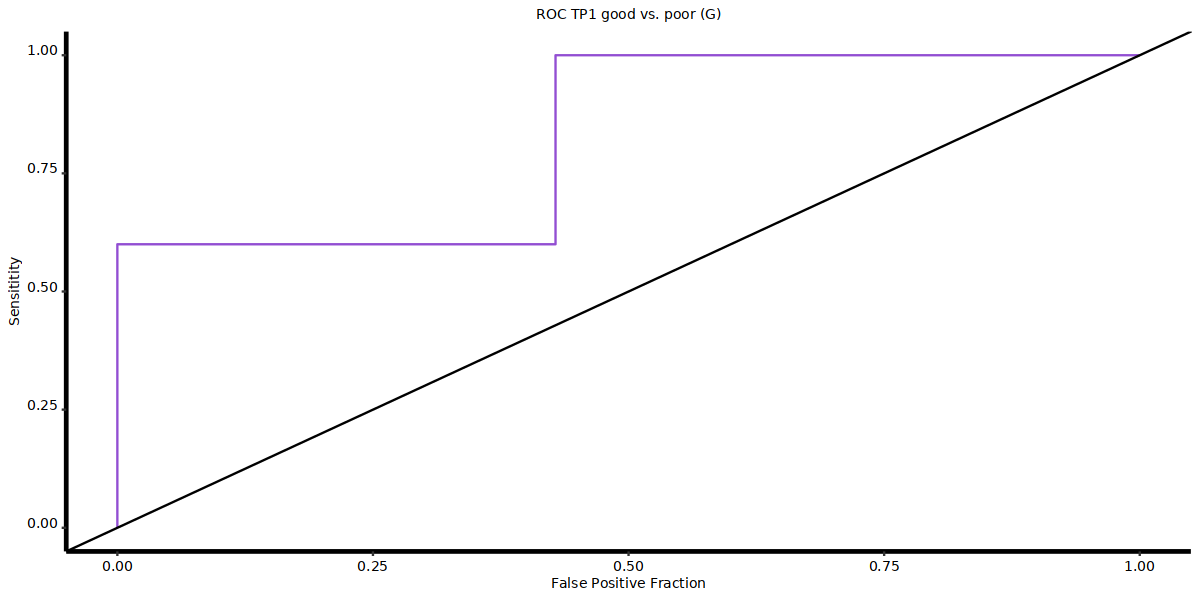

In [133]:
## Configuration + Modification of plot
roc_plot = rocplot + 
    plot_config + 
    xtitle + 
    ytitle + 
    ggtitle('ROC TP1 good vs. poor (G)') +
    geom_abline(slope = 1, intercept = 0) +     
   scale_color_manual(values = c('Lasso on top features of Factor 4' = "#924ED2"
                                 ))+
   scale_linetype_manual(values = c('Lasso on top features of Factor 4' = "solid"
                                 ))+
    theme(legend.position = 'none')

#legend_roc = get_legend(roc_plot)
options(repr.plot.width=10, repr.plot.height=5)   
roc_plot

In [134]:
pdf(paste0('figures/Final_Figures/', figure_name, '.pdf'), width =width_par, height =height_par)
print(roc_plot)
dev.off()

Warning message:
“The following aesthetics were dropped during statistical transformation: m, d
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


png 
  2

In [135]:
### Calculate AUC values

In [136]:
auc_values = data.frame()

In [137]:
for(i in unique(prediction$model)){
    calc_auc = data.frame(model = i, 
                          auc = auc(prediction$y[prediction$model == i], prediction$value[prediction$model == i])
                          )
    auc_values = rbind(auc_values, calc_auc)
    }

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [138]:
auc_values

model,auc
<chr>,<auc>
Lasso on top features of Factor 4,0.8285714


In [139]:
color_data = data.frame(description = c('Lasso on top features of Factor 4'),
                        color = c( "#924ED2"))

In [140]:
### Seperately define legend

In [141]:
legend_add  = Legend(labels = unique(color_data$description), labels_gp = gpar(fontsize = 8),legend_gp =list(col = unique(c(unique(color_data$color)))), 
    nrow = 1, type = 'lines') 

In [142]:
legend_add_vertical = packLegend(legend_add, direction = "horizontal")

In [143]:
pdf(paste0('figures/Final_Figures/ROC_Lasso_Legend_Text', '.pdf'), 
    width =1.9, 
    height = 0.15)
draw(legend_add_vertical)
dev.off()

png 
  2

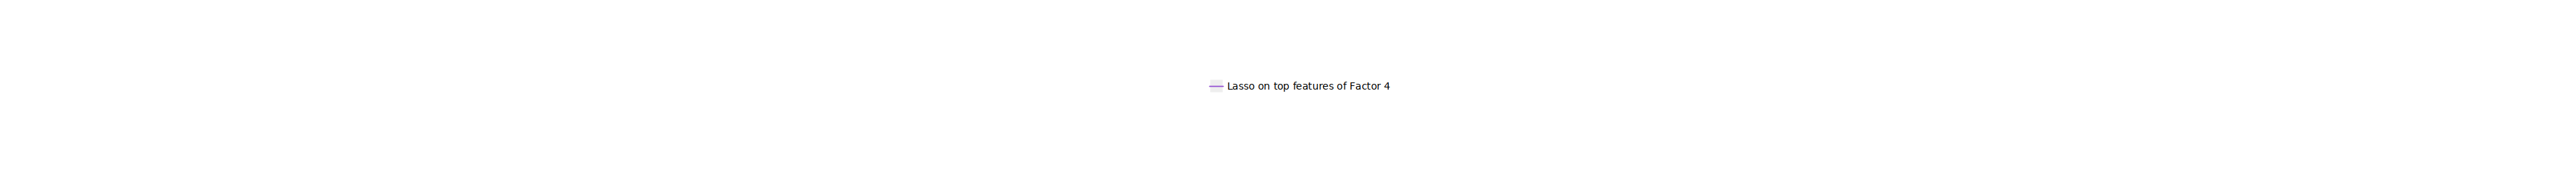

In [144]:
options(repr.plot.width=30, repr.plot.height=2)
draw(legend_add_vertical)

### Prediction metrics table

In [145]:
### generate additional prediction metrics table

In [146]:
## Recode y as factor

In [147]:
prediction$y = as.factor(prediction$y)  

In [148]:
levels(prediction$y)

[1] "0" "1"

In [149]:
prediction$y = relevel(prediction$y, '0')

In [150]:
### Calculate prediction metrics

In [151]:
#prediction

In [152]:
prediction_lasso_GR = measureit(score = prediction$value, class = prediction$y, measure = c( 'PREC', 'REC', 'SPEC', 'FPR'))

In [153]:
prediction_lasso_GR  = data.frame(do.call(cbind, prediction_lasso_GR ))
prediction_lasso_GR$model = 'Lasso on top features of Factor 4'

In [154]:
#prediction_lasso_GR

In [155]:
### Save as supplementary table

In [156]:
write.csv(prediction_lasso_GR, paste0(result_path_model,'/Supplementary/SUPP_GX3_2_Lasso_prediction_metrics.csv'), row.names = FALSE)

## Only NK cell features

### ROC and AUC

In [157]:
head(prediction_NK,2)

,predicted_value,sample_id
,<dbl>,<chr>
Baseline.TEST_1,0.10346422,Baseline.TEST_1
Baseline.TEST_12,0.07982498,Baseline.TEST_12


In [158]:
## Extract record_id and TP from predictions

In [159]:
prediction_NK$record_id = str_replace(prediction_NK$sample_id, '.*_', '')

In [160]:
prediction_NK$tp = str_extract(prediction_NK$sample_id, '.*\\.')

In [161]:
unique(prediction_NK$tp)

[1] "Baseline." "t24h."     "t8w."      "UT."

In [162]:
nrow(prediction_NK)

[1] 103

In [163]:
## Add sample data outcome

In [164]:
prediction_NK = merge(prediction_NK, sample_data[,c('record_id', 'outcome')])

In [165]:
nrow(prediction_NK)

[1] 72

In [166]:
unique(prediction_NK$tp)

[1] "Baseline." "t8w."      "t24h."

In [167]:
## Filter on TP1 (= Baseline prediction)

In [168]:
prediction_NK = prediction_NK[prediction_NK$tp == 'Baseline.',]

In [169]:
head(prediction_NK,2)

,record_id,predicted_value,sample_id,tp,outcome
,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,0.10346422,Baseline.TEST_1,Baseline.,NA
4,12,0.07982498,Baseline.TEST_12,Baseline.,NA


In [170]:
### only samples with known outcome
prediction_NK = prediction_NK[!is.na(prediction_NK$outcome),]

In [171]:
nrow(prediction_NK)

[1] 12

In [172]:
## Recode outcome variable to 0/1

In [173]:
prediction_NK$y = 1
prediction_NK$y[prediction_NK$outcome == 'Better'] = 0

In [174]:
#Set name for the prediction

In [175]:
prediction_NK$model = 'GLM Validation TP1 (G)'

In [176]:
train_predictions_NK$predicted_value = train_predictions_NK$s1
train_predictions_NK$model = 'GLM Training TP1 (M)'

In [177]:
head(train_predictions_NK,2)

,X,y,s1,predicted_value,model
,<int>,<int>,<dbl>,<dbl>,<chr>
1,42,1,0.1309654,0.1309654,GLM Training TP1 (M)
2,46,1,0.4522560,0.4522560,GLM Training TP1 (M)


In [178]:
## Combine training and test predictions

In [179]:
prediction_NK = rbind(prediction_NK[,c('y', 'predicted_value', 'model')], train_predictions_NK[,c('y','predicted_value', 'model')])

In [180]:
## Plot the ROC curve 

In [181]:
# Figure Name
figure_name = 'FIG10_GX3_ROC_GR_NK_GLM_TP1'

In [182]:
# Sizes of the plot
width_par = 1.9
height_par = 2

In [183]:
xtitle = xlab( 'False Positive Fraction')
ytitle  = ylab('Sensititity')

In [184]:
## Specify Plot
rocplot = ggplot(prediction_NK, aes(m = predicted_value, d =y, color = model, linetype = model))+ geom_roc(n.cuts=0,labels=FALSE, size = 0.5)

Warning message:
“The following aesthetics were dropped during statistical transformation: m, d
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


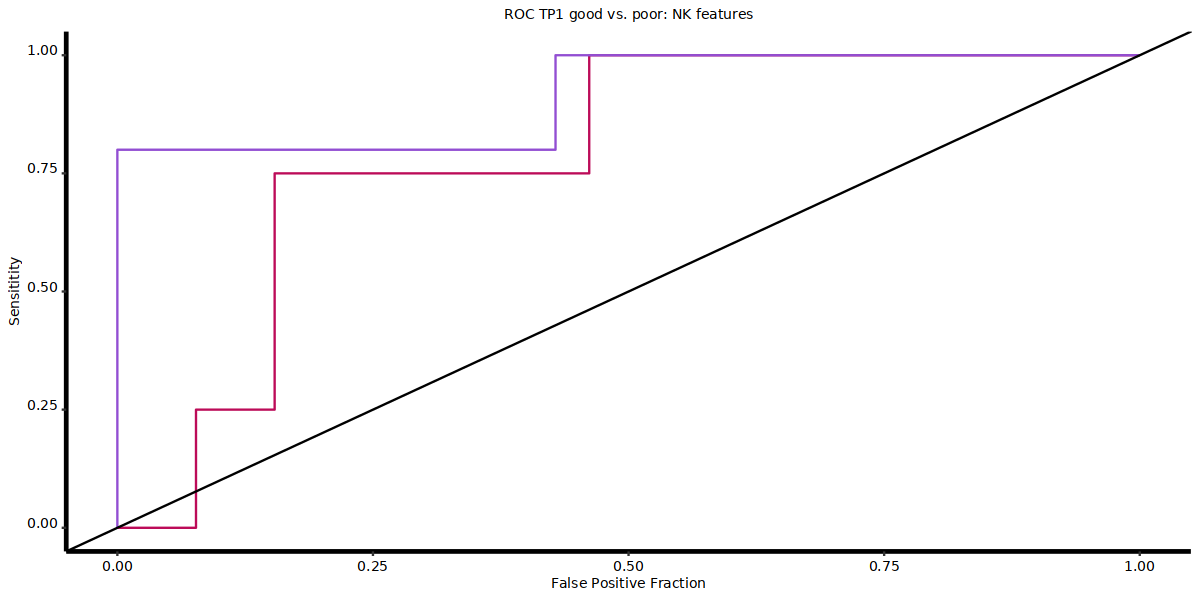

In [185]:
## Configuration + Modification of plot
roc_plot = rocplot + 
    plot_config + 
    xtitle + 
    ytitle + 
    ggtitle('ROC TP1 good vs. poor: NK features') +
    geom_abline(slope = 1, intercept = 0) +     
    scale_color_manual(values = c('GLM Validation TP1 (G)' = "#924ED2",
                                  'GLM Training TP1 (M)' = "#BC0B58"
                                 ))+
   scale_linetype_manual(values = c('GLM Validation TP1 (G)' = "solid",
                                     'GLM Training TP1 (M)' = "solid"
                                 ))+
    theme(legend.position = 'none')

#legend_roc = get_legend(roc_plot)
    
options(repr.plot.width=10, repr.plot.height=5)
roc_plot

In [186]:
pdf(paste0('figures/Final_Figures/', figure_name, '.pdf'), width =width_par, height =height_par)
print(roc_plot)
dev.off()

Warning message:
“The following aesthetics were dropped during statistical transformation: m, d
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


png 
  2

In [187]:
### Calculate the AUC values

In [188]:
auc_values = data.frame()

In [189]:
for(i in unique(prediction_NK$model)){
    calc_auc = data.frame(model = i, 
                          auc = auc(prediction_NK$y[prediction_NK$model == i], prediction_NK$predicted_value[prediction_NK$model == i])
                          )
    auc_values = rbind(auc_values, calc_auc)
    }

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [190]:
auc_values

model,auc
<chr>,<auc>
GLM Validation TP1 (G),0.9142857
GLM Training TP1 (M),0.7884615


In [191]:
color_data = data.frame(description = c('GLM Validation TP1 (G)', 'GLM Training TP1 (M)'),
                        color = c( "#924ED2","#BC0B58"))

In [192]:
### Seperately define legend

In [193]:
legend_add  = Legend(labels = unique(color_data$description), labels_gp = gpar(fontsize = 8),legend_gp =list(col = unique(c(unique(color_data$color)))), 
    nrow = 2, type = 'lines') 

In [194]:
legend_add_vertical = packLegend(legend_add, direction = "horizontal")

In [195]:
pdf(paste0('figures/Final_Figures/ROC_NK_GLM_Legend_Text', '.pdf'), 
    width =1.9, 
    height = 0.3)
draw(legend_add_vertical)
dev.off()

png 
  2

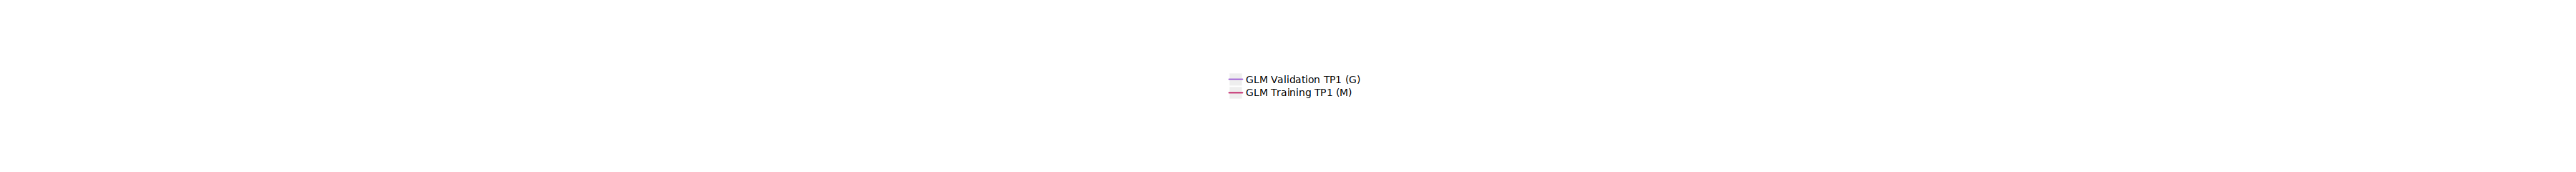

In [196]:
options(repr.plot.width=30, repr.plot.height=2)
draw(legend_add_vertical)

### Prediction metrics table

In [197]:
## Generate additional prediction metrics for supplementary

In [198]:
head(prediction_NK,2)

,y,predicted_value,model
,<dbl>,<dbl>,<chr>
8,0,0.04314546,GLM Validation TP1 (G)
11,0,0.03255807,GLM Validation TP1 (G)


In [199]:
## Convert outcome to factor variable

In [200]:
prediction_NK$y = as.factor(prediction_NK$y)

In [201]:
levels(prediction_NK$y)

[1] "0" "1"

In [202]:
prediction_NK$y = relevel(prediction_NK$y, '0')

In [203]:
## Generate prediction metrics for different models

In [204]:
nk_cell_prediction_metrics = data.frame()

In [205]:
for(i in unique(prediction_NK$model)){
    data = prediction_NK[prediction_NK$model == i,]
    metrics = measureit(score = data$predicted_value, class = data$y, measure = c( 'PREC', 'REC', 'SPEC', 'FPR'))
    metrics = data.frame(do.call(cbind, metrics))
    metrics$model = i
    
    nk_cell_prediction_metrics = rbind( metrics, nk_cell_prediction_metrics)
    }

In [206]:
head(nk_cell_prediction_metrics,2)

,Cutoff,Depth,TP,FP,TN,FN,SPEC,PREC,REC,FPR,model
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Inf,0.00000000,0,0,13,4,1.0000000,NaN,0,0.00000000,GLM Training TP1 (M)
2,0.5577295,0.05882353,0,1,12,4,0.9230769,0,0,0.07692308,GLM Training TP1 (M)


In [207]:
# Save the data

In [208]:
write.csv(nk_cell_prediction_metrics, paste0(result_path_model,'/Supplementary/SUPP_GX3_2_NK_GLM_prediction_metrics.csv'), row.names = FALSE)